In [2]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd
from mpl_interactions import ioff, panhandler, zoom_factory

import re


In [17]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
# ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
hits = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_smear.h5", 'MC/hits')
display(hits)

event_hits = hits[hits.event_id == 0]

parts = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_smear.h5", 'MC/particles')
event_parts = parts[parts.event_id == 0]
display(event_parts)

,event_id,x,y,z,energy
0,0,-2515.370605,-1464.385498,3907.753906,0.000075
1,0,-2521.760254,-1476.692627,3909.305176,0.000075
2,0,-2516.057617,-1489.982056,3909.435303,0.000025
3,0,-2527.257812,-1488.821411,3909.648682,0.000025
4,0,-2514.201172,-1510.850464,3911.634277,0.000025
...,...,...,...,...,...
5025,0,-2521.285645,-1561.471924,4530.490723,0.000025
5026,0,-2505.755615,-1552.786499,4531.724121,0.000050
5027,0,-2518.357178,-1560.968018,4532.848633,0.000025
5028,0,-2510.728516,-1556.648804,4534.717285,0.000025


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,2,e-,1,0,-2680.175537,-1303.920166,1088.678711,0.000000,-2534.611816,...,0.321688,-0.851509,-1.456790,-0.0,0.0,-0.0,1.281181,1990.089355,none,eIoni
1,0,170,e-,0,2,-2534.548828,-1562.431641,1492.471069,7.793221,-2534.549561,...,-0.005555,0.003999,-0.000147,-0.0,0.0,-0.0,0.000046,0.000866,eIoni,msc
2,0,169,e-,0,2,-2534.548828,-1562.431641,1492.471069,7.793221,-2534.548340,...,0.002597,-0.003403,0.001640,-0.0,-0.0,0.0,0.000021,0.001504,eIoni,msc
3,0,168,e-,0,2,-2534.548828,-1562.431641,1492.471069,7.793221,-2534.548584,...,0.001360,0.000244,-0.003284,-0.0,-0.0,-0.0,0.000012,0.001092,eIoni,msc
4,0,167,e-,0,2,-2534.548828,-1562.431641,1492.471069,7.793221,-2534.549805,...,-0.006782,-0.000364,0.000069,0.0,-0.0,-0.0,0.000045,0.001031,eIoni,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0,414,e-,0,1,-2673.224609,-1295.143066,1212.751587,0.473403,-2673.218750,...,-0.001937,0.037649,0.020931,-0.0,-0.0,0.0,0.001816,0.092751,eIoni,eIoni
664,0,413,e-,0,1,-2676.719727,-1294.781372,1211.022339,0.459639,-2676.727783,...,-0.012703,-0.043445,0.010111,0.0,0.0,-0.0,0.002100,0.058320,eIoni,eIoni
665,0,412,e-,0,1,-2683.476562,-1290.719116,1191.513184,0.383109,-2683.436523,...,0.038024,-0.037198,-0.008405,-0.0,0.0,-0.0,0.002830,0.224734,eIoni,eIoni
666,0,411,e-,0,1,-2696.062012,-1296.431274,1124.738647,0.141172,-2696.109131,...,-0.053994,0.010193,-0.011781,-0.0,-0.0,-0.0,0.003081,0.154140,eIoni,eIoni


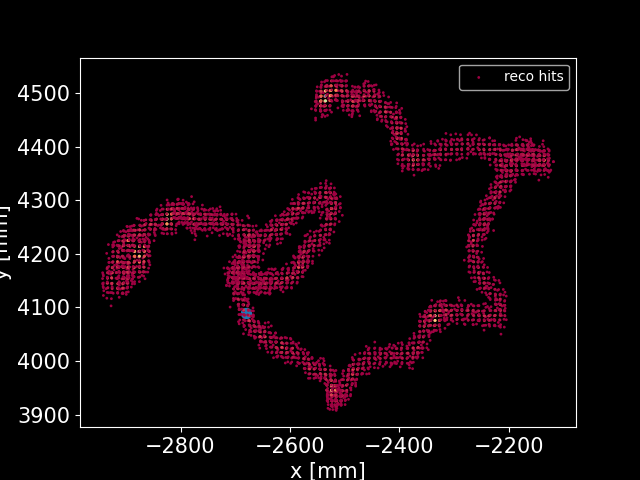

In [19]:

# Make a 3D view of the track
%matplotlib widget
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111)

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
ax.scatter(event_hits.x, event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# ax.set_xlim(-2000, -500)
# ax.set_ylim(4000, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)

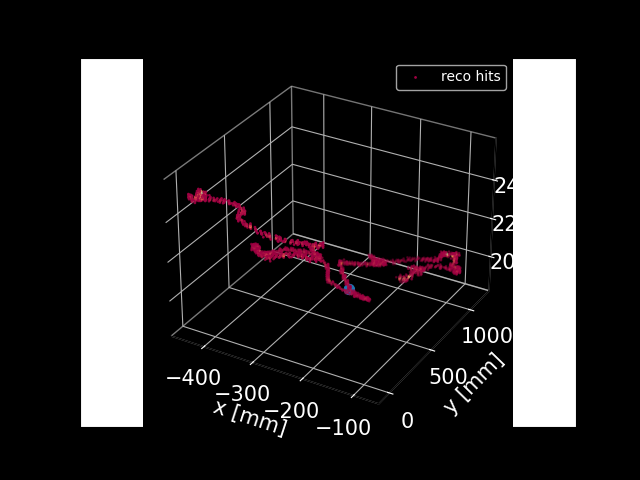

In [105]:
%matplotlib widget



# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_y, event_parts[event_parts.primary==1].initial_z+3000, s=50)

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)